In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torch.nn as nn	# 各种层类型的实现
import torch.nn.functional as F	# 各中层函数的实现，与层类型对应，如：卷积函数、池化函数、归一化函数等等
import torch.optim as optim	# 实现各种优化算法的包
from torchvision import datasets, transforms
import numpy as np

import argparse
import sys

import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
from grid_data import GridData

from compute_mpe import CircuitMPE
import sys
sys.path.insert(0,'/root/gurobi903/linux64/lib/python3.6_utf32/gurobipy')

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=args.solDim,out_channels=hidden_dim,kernel_size=1)
        self.conv2 =  nn.Conv1d(in_channels=hidden_dim,out_channels=args.solDim,kernel_size=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):

        x= self.conv1(x)
        x= self.relu(x)
        x=self.conv2 (x)
        x= self.sigmoid(x)
        return x

def train(args, model,  optimizer, epoch): # 还可添加loss_func等参数
    #model.train() # 必备，将模型设置为训练模式
    for i in range(400): # 从数据加载器迭代一个batch的数据
        data=torch.from_numpy(output.astype(np.float32)).view([1,2,1])
        output = model(data).detach().numpy()[0]  # 喂入数据并前向传播获取输出
        loss =torch.from_numpy(np.array([(output[0]-0.3)**2+(output[1]-0.7)**2])).requires_grad_()
        #optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if i % args.log_interval == 0: # 根据设置的显式间隔输出训练日志
            print(i,loss)


In [3]:
cmpe = CircuitMPE('/root/PySDD/notebooks/yahoo.vtree', '/root/PySDD/notebooks/yahoo.sdd')
rateList=np.load('rateListUsersYahoo.npy')[0]
#cmpe = CircuitMPE('4-grid-out.vtree.sd', '4-grid-all-pairs-sd.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=2
        self.solDim=100
        self.card=20
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=10
args=para()

torch.manual_seed(args.seed) # 设置随机种子，保证可重复性
def checkFea(x):
    x=x.view(args.solDim)
    legalList={0: [24, 78], 1: [3, 29, 59, 83, 116], 2: [], 3: [1, 43, 64, 83, 90, 161], 4: [], 5: [], 6: [25, 151], 7: [12, 16, 19, 29, 36, 79, 118, 136, 166], 8: [], 9: [26, 30, 64], 10: [79, 109, 138, 181], 11: [], 12: [7, 17, 29, 31, 36, 79], 13: [197], 14: [], 15: [133, 148], 16: [7, 32], 17: [12, 31, 36, 82, 119], 18: [29, 182], 19: [7, 24, 36, 71, 85, 140, 183], 20: [29], 21: [46, 173, 193], 22: [], 23: [], 24: [0, 19, 30, 64], 25: [6, 54, 151], 26: [9, 40, 59, 64, 111, 145], 27: [69, 106], 28: [115], 29: [1, 7, 12, 18, 20, 43, 59, 83, 116, 136, 182, 185], 30: [9, 24, 156], 31: [12, 17, 164], 32: [16, 40, 64], 33: [94], 34: [], 35: [], 36: [7, 12, 17, 19, 82, 136], 37: [108, 124], 38: [121], 39: [], 40: [26, 32, 146], 41: [96], 42: [177], 43: [3, 29, 48, 83, 104, 128, 136, 182, 185], 44: [180], 45: [131, 137], 46: [21, 148, 178, 193], 47: [], 48: [43, 67, 104, 135], 49: [], 50: [], 51: [], 52: [], 53: [151], 54: [25, 136], 55: [129], 56: [137, 186], 57: [148], 58: [], 59: [1, 26, 29, 120, 185], 60: [143], 61: [], 62: [], 63: [67, 115, 155], 64: [3, 9, 24, 26, 32, 71], 65: [93, 97, 194], 66: [], 67: [48, 63, 135, 155], 68: [126], 69: [27], 70: [], 71: [19, 64, 156, 183], 72: [106, 123, 144, 194], 73: [94, 180, 196], 74: [], 75: [125], 76: [102], 77: [196], 78: [0, 127], 79: [7, 10, 12, 103], 80: [], 81: [125, 140], 82: [17, 36, 106, 112, 129], 83: [1, 3, 29, 43, 108, 116, 151, 182], 84: [89, 92, 157], 85: [19, 147, 195], 86: [117], 87: [111], 88: [158], 89: [84, 166], 90: [3], 91: [95], 92: [84, 149, 157], 93: [65], 94: [33, 73], 95: [91, 155], 96: [41], 97: [65, 100, 112, 123, 195], 98: [], 99: [], 100: [97, 101], 101: [100], 102: [76, 141], 103: [79, 122, 199], 104: [43, 48], 105: [], 106: [27, 72, 82, 123, 157, 188, 194], 107: [171], 108: [37, 83, 117], 109: [10, 181], 110: [146], 111: [26, 87, 130], 112: [82, 97, 145], 113: [145], 114: [], 115: [28, 63], 116: [1, 29, 83, 117], 117: [86, 108, 116], 118: [7, 122, 162, 167, 182], 119: [17, 122, 172], 120: [59], 121: [38, 130], 122: [103, 118, 119, 199], 123: [72, 97, 106, 129, 144, 157, 173, 194], 124: [37, 184, 187], 125: [75, 81, 140, 141, 154], 126: [68], 127: [78], 128: [43], 129: [55, 82, 123, 170, 194], 130: [111, 121], 131: [45], 132: [161], 133: [15, 155], 134: [195], 135: [48, 67, 155], 136: [7, 29, 36, 43, 54, 153], 137: [45, 56, 182], 138: [10], 139: [], 140: [19, 81, 125, 179, 183], 141: [102, 125], 142: [], 143: [60], 144: [72, 123, 194], 145: [26, 112, 113, 155], 146: [40, 110], 147: [85, 195], 148: [15, 46, 57, 188, 193], 149: [92, 157], 150: [189], 151: [6, 25, 53, 83, 159], 152: [], 153: [136, 155, 185], 154: [125, 183], 155: [63, 67, 95, 133, 135, 145, 153, 158, 178], 156: [30, 71], 157: [84, 92, 106, 123, 149], 158: [88, 155], 159: [151], 160: [193], 161: [3, 132], 162: [118, 167], 163: [], 164: [31], 165: [], 166: [7, 89], 167: [118, 162], 168: [], 169: [], 170: [129], 171: [107], 172: [119], 173: [21, 123], 174: [], 175: [], 176: [], 177: [42], 178: [46, 155], 179: [140], 180: [44, 73, 194, 196], 181: [10, 109], 182: [18, 29, 43, 83, 118, 137], 183: [19, 71, 140, 154], 184: [124], 185: [29, 43, 59, 153], 186: [56], 187: [124], 188: [106, 148], 189: [150], 190: [], 191: [], 192: [], 193: [21, 46, 148, 160], 194: [65, 72, 106, 123, 129, 144, 180, 195], 195: [85, 97, 134, 147, 194, 198], 196: [73, 77, 180], 197: [13], 198: [195], 199: [103, 122]}
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            if x[j]+x[i]>1:
                print(i,j)
                return 0
    return 1
use_cuda = True#not args.no_cuda and torch.cuda.is_available() # 根据输入参数和实际cuda的有无决定是否使用GPU
device = torch.device("cuda") # if use_cuda else "cpu" 设置使用CPU or GPU
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {} # 设置数据加载的子进程数；是否返回之前将张量复制到cuda的页锁定内存
hidden_dim=10
fmin,fmax,gmin,gmax=None,None,None,None

# Example of using Sequential
model =Net()#.to('cuda') #MPNN(6,20,10,3,6)

def weights_init(mod):
    """设计初始化函数"""
    classname=mod.__class__.__name__
    # 返回传入的module类型
    print(classname)
    if classname.find('Conv')!= -1:    #这里的Conv和BatchNnorm是torc.nn里的形式
        mod.weight.data.normal_(-0.1,0.2)
    elif classname.find('BatchNorm')!= -1:
        mod.weight.data.normal_(1.0,0.2) #bn层里初始化γ，服从（1，0.02）的正态分布
        mod.bias.data.fill_(0)  #bn层里初始化β，默认为0

model.apply(weights_init)
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum) # 实例化求解器
losslist=[]
optlist=[]
feasiblelist=[]
fmin,fmax,gmin,gmax=None,None,None,None
flag=0
for i in range(400): # 从数据加载器迭代一个batch的数据
    xdata,ydata=[],[]

    for _ in range(args.batch_size):
        data=torch.from_numpy(np.array([0.02]*args.solDim).astype(np.float32)).view([1,args.solDim,1])#.to(device)
        output = model.forward(data)#.detach().numpy()[0]  # 喂入数据并前向传播获取输出
        yu=torch.unbind(output.view(args.solDim))
        xu = torch.unbind(data.view(args.solDim))
        wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu])
        if i>15 and sum(output[0]>0.5)>=args.card*0.9:
            flag=1
            break
        if sum(torch.isnan(output)[0])>0:
            loss =  (sum(output[0])-args.card)**2+ (sum(sorted(rateList[:args.solDim])[-args.card:])-torch.mm((output>0.5).float().view([1,args.solDim]),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1])).float())-args.wmc*torch.log(torch.mean(wmc)).float()
        else:
            if np.random.random()<0.1:
                output=torch.from_numpy(np.array([np.random.choice([0,1],p=[1-args.card/args.solDim,args.card/args.solDim])  for _ in range(args.solDim)])).view([1,args.solDim,1])
            pf=1-0.5*(1-np.cos(i/100 *np.pi)) 
            f= -args.wmc*torch.log(torch.mean(wmc)).float()+(sum(sorted(rateList[:args.solDim])[-args.card:])-torch.mm((output[0]>0.5).float().view([1,args.solDim]),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1])).float())
            g=(sum(output[0])-args.card)**2+sum((0.5-abs(0.5-output))[0])
            if fmin==None:
                fmin=f.detach().numpy()[0][0]
            if fmax==None:
                fmax=f.detach().numpy()[0][0]
            if gmin==None:
                gmin=g.item()
            if gmax==None:
                gmax=g.item()
            if fmin>f.detach().numpy()[0][0]:
                fmin=f.detach().numpy()[0][0]
            if fmax<f.detach().numpy()[0][0]:
                fmax=f.detach().numpy()[0][0]
            if gmin>g.item():
                gmin=g.item()
            if gmax<g.item():
                gmax=g.item()
            if fmin!=fmax:
                fnorm=(f-fmin)/(fmax-fmin)
            else:
                fnorm=f
            if gmin!=gmax:
                gnorm=(g-gmin)/(gmax-gmin)
            else:
                gnorm=g
            if i>0:
                pf=max(pf,0.6*follow_constraints)
            loss= pf*f+(1-pf)*g
            print(loss,sum(output[0]>0.5),torch.mm((output[0]>0.5).float().view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float()),g)
        #loss= 0.2*(sum(sorted(rateList[:args.solDim])[:])-torch.mm((output).view([1,args.solDim]),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1])))-args.wmc*torch.log(torch.mean(wmc))
        loss=loss.requires_grad_()
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        ydata.append(np.array(yu))
        xdata.append(np.array(data))
    if flag:
        break
    #print((sum(sorted(rateList[:args.solDim])[-args.card:])-torch.mm(output.view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float())),g)
    print(checkFea(output),loss.detach().numpy(), torch.mm((output[0]>0.5).float().view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float()))
    follow_constraints= float(np.sum([cmpe.weighted_model_count([(1-p, p) for p in  np.concatenate((o, inp))]) for o, inp in zip(np.array(np.array(ydata).reshape([args.batch_size,args.solDim]) + 0.5, int), np.array(xdata).reshape([args.batch_size,args.solDim]))]))/args.batch_size
    print('Percentage of predictions that follow constraint: ',follow_constraints)
        
    #if i % args.log_interval == 0: # 根据设置的显式间隔输出训练日志
     #   print(loss)
#for epoch in range(1, args.epochs + 1): # 循环调用train() and test() 进行epoch迭代
 #   train(args, model,optimizer=optimizer, epoch=epoch)


Conv1d
Conv1d
ReLU
Sigmoid
Net


RuntimeError: shape '[100, 1]' is invalid for input of size 24

In [ ]:


cmpe = CircuitMPE('/root/PySDD/notebooks/syn200.vtree', '/root/PySDD/notebooks/syn200.sdd')
rateList=np.load('rateListSyn200.npy')
#cmpe = CircuitMPE('4-grid-out.vtree.sd', '4-grid-all-pairs-sd.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=2
        self.solDim=200
        self.card=20
        self.test_batch_size=1000
        self.epochs=20
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=10
args=para()

torch.manual_seed(args.seed) # 设置随机种子，保证可重复性
def checkFea(x):
    cnt=0
    cntT=0
    x=(x[0]>0.5).float().view(args.solDim)
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            cntT+=1
            if x[j]+x[i]>1:
                cnt+=1
    return cnt/cntT/2+abs(x.sum()-args.card)/args.card/2

use_cuda = True#not args.no_cuda and torch.cuda.is_available() # 根据输入参数和实际cuda的有无决定是否使用GPU
device = torch.device("cuda") # if use_cuda else "cpu" 设置使用CPU or GPU
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {} # 设置数据加载的子进程数；是否返回之前将张量复制到cuda的页锁定内存
hidden_dim=10
fmin,fmax,gmin,gmax=None,None,None,None

# Example of using Sequential
model =Net()#.to('cuda') #MPNN(6,20,10,3,6)

def weights_init(mod):
    """设计初始化函数"""
    classname=mod.__class__.__name__
    # 返回传入的module类型
    print(classname)
    if classname.find('Conv')!= -1:    #这里的Conv和BatchNnorm是torc.nn里的形式
        mod.weight.data.normal_(-0.1,0.2)
    elif classname.find('BatchNorm')!= -1:
        mod.weight.data.normal_(1.0,0.2) #bn层里初始化γ，服从（1，0.02）的正态分布
        mod.bias.data.fill_(0)  #bn层里初始化β，默认为0

model.apply(weights_init)
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum) # 实例化求解器
losslist=[]
optlist=[]
feasiblelist=[]
for i in range(1000): # 从数据加载器迭代一个batch的数据
    xdata,ydata=[],[]
    for _ in range(args.batch_size):
        data=torch.from_numpy(np.array([0.02]*args.solDim).astype(np.float32)).view([1,args.solDim,1])#.to(device)
        output = model.forward(data)#.detach().numpy()[0]  # 喂入数据并前向传播获取输出
        yu=torch.unbind(output.view(args.solDim)) #(output[0]>0.5).float()
        xu = torch.unbind(data.view(args.solDim))
        wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu])
        #loss= 0.2*(sum(sorted(rateList[:args.solDim])[:])-torch.mm((output[0]).view([1,args.solDim]),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1])))-args.wmc*torch.log(torch.mean(wmc))
        loss=(output[0].sum()-args.card)**2+5*(sum(sorted(rateList[:args.solDim])[-args.card:])-torch.mm((output[0]>0.5).float().view([1,args.solDim]),torch.from_numpy(np.array(rateList[:args.solDim])).float().view([args.solDim,1])))-args.wmc*torch.log(torch.mean(wmc)).float()
        loss=loss.float()
        loss=loss.requires_grad_()
        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        ydata.append(np.array(yu))
        xdata.append(np.array(data))
        losslist.append(loss.detach().numpy())
        optlist.append(torch.mm((output[0]>0.5).float().view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).float().view([args.solDim,1]) ))
    #print((sum(sorted(rateList[:args.solDim])[-args.card:])-torch.mm(action.view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float())),g)
        feasiblelist.append(1-checkFea(output))
        
        print(checkFea(output),loss.detach().numpy(),(output[0]>0.5).sum().item() ,torch.mm((output[0]>0.5).float().view([1,args.solDim]).float(),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]).float()))
    #follow_constraints= float(np.sum([cmpe.weighted_model_count([(1-p, p) for p in  np.concatenate((o, inp))]) for o, inp in zip(np.array(np.array(ydata).reshape([args.batch_size,args.solDim]) + 0.5, int), np.array(xdata).reshape([args.batch_size,args.solDim]))]))/args.batch_size
    
    #print('Percentage of predictions that follow constraint: ',follow_constraints)
        
    #if i % args.log_interval == 0: # 根据设置的显式间隔输出训练日志
     #   print(loss)
#for epoch in range(1, args.epochs + 1): # 循环调用train() and test() 进行epoch迭代
 #   train(args, model,optimizer=optimizer, epoch=epoch)
losslist=[i[0][0] for i in losslist]

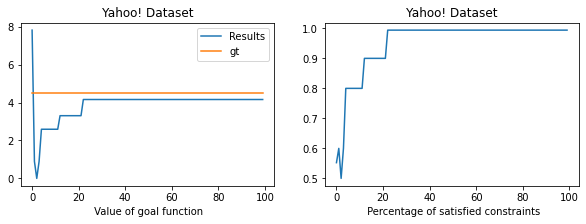

In [102]:
import matplotlib.pyplot as plt


f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(optlist[:100])
ax.plot([4.529585900000e+00]*100)
ax2.plot(feasiblelist[:100])
ax.legend(['Results','gt'])
ax.set_xlabel(' Value of goal function')
ax.title.set_text('Yahoo! Dataset')
ax2.set_xlabel(' Percentage of satisfied constraints')
ax2.title.set_text('Yahoo! Dataset')

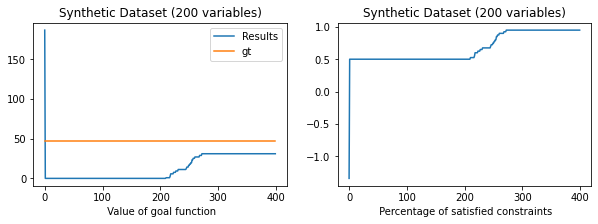

In [107]:
import matplotlib.pyplot as plt


f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(optlist[:400])
ax.plot([4.656450416554e+01]*400)
ax2.plot(feasiblelist[:400])
ax.legend(['Results','gt'])
ax.set_xlabel(' Value of goal function')
ax.title.set_text('Synthetic Dataset (200 variables)')
ax2.set_xlabel(' Percentage of satisfied constraints')
ax2.title.set_text('Synthetic Dataset (200 variables)')

In [7]:
legalListYahoo={0: [13, 18],
 1: [4, 17, 19, 20, 22],
 2: [4, 5, 10, 13, 14, 16, 17, 18, 19, 20, 22],
 3: [5, 6, 8, 9, 11, 12, 15],
 4: [1, 2, 10, 13, 14, 16, 17, 18, 20, 22],
 5: [2, 3, 6, 9, 10, 11, 12, 14, 15, 16, 17],
 6: [3, 5, 9, 11, 12, 15, 17],
 7: [],
 8: [3, 9, 11, 12],
 9: [3, 5, 6, 8, 11, 12, 15],
 10: [2, 4, 5, 13, 14, 16, 17, 18, 22],
 11: [3, 5, 6, 8, 9, 12, 15],
 12: [3, 5, 6, 8, 9, 11, 15],
 13: [0, 2, 4, 10, 14, 16, 18, 22],
 14: [2, 4, 5, 10, 13, 16, 17, 18, 20, 22],
 15: [3, 5, 6, 9, 11, 12, 17, 19, 20],
 16: [2, 4, 5, 10, 13, 14, 17, 18, 22],
 17: [1, 2, 4, 5, 6, 10, 14, 15, 16, 19, 20, 22],
 18: [0, 2, 4, 10, 13, 14, 16, 22],
 19: [1, 2, 15, 17, 20, 22],
 20: [1, 2, 4, 14, 15, 17, 19, 22],
 21: [],
 22: [1, 2, 4, 10, 13, 14, 16, 17, 18, 19, 20],
 23: []}


In [33]:
output[0].numpy().T.dot(rateList)

array([4.1604353])

In [31]:
#tmp=np.random.random([200,200])
#np.save('Q.npy',tmp)

In [32]:
Q=np.load('Q.npy')
legalList={0: [24, 78], 1: [3, 29, 59, 83, 116], 2: [], 3: [1, 43, 64, 83, 90, 161], 4: [], 5: [], 6: [25, 151], 7: [12, 16, 19, 29, 36, 79, 118, 136, 166], 8: [], 9: [26, 30, 64], 10: [79, 109, 138, 181], 11: [], 12: [7, 17, 29, 31, 36, 79], 13: [197], 14: [], 15: [133, 148], 16: [7, 32], 17: [12, 31, 36, 82, 119], 18: [29, 182], 19: [7, 24, 36, 71, 85, 140, 183], 20: [29], 21: [46, 173, 193], 22: [], 23: [], 24: [0, 19, 30, 64], 25: [6, 54, 151], 26: [9, 40, 59, 64, 111, 145], 27: [69, 106], 28: [115], 29: [1, 7, 12, 18, 20, 43, 59, 83, 116, 136, 182, 185], 30: [9, 24, 156], 31: [12, 17, 164], 32: [16, 40, 64], 33: [94], 34: [], 35: [], 36: [7, 12, 17, 19, 82, 136], 37: [108, 124], 38: [121], 39: [], 40: [26, 32, 146], 41: [96], 42: [177], 43: [3, 29, 48, 83, 104, 128, 136, 182, 185], 44: [180], 45: [131, 137], 46: [21, 148, 178, 193], 47: [], 48: [43, 67, 104, 135], 49: [], 50: [], 51: [], 52: [], 53: [151], 54: [25, 136], 55: [129], 56: [137, 186], 57: [148], 58: [], 59: [1, 26, 29, 120, 185], 60: [143], 61: [], 62: [], 63: [67, 115, 155], 64: [3, 9, 24, 26, 32, 71], 65: [93, 97, 194], 66: [], 67: [48, 63, 135, 155], 68: [126], 69: [27], 70: [], 71: [19, 64, 156, 183], 72: [106, 123, 144, 194], 73: [94, 180, 196], 74: [], 75: [125], 76: [102], 77: [196], 78: [0, 127], 79: [7, 10, 12, 103], 80: [], 81: [125, 140], 82: [17, 36, 106, 112, 129], 83: [1, 3, 29, 43, 108, 116, 151, 182], 84: [89, 92, 157], 85: [19, 147, 195], 86: [117], 87: [111], 88: [158], 89: [84, 166], 90: [3], 91: [95], 92: [84, 149, 157], 93: [65], 94: [33, 73], 95: [91, 155], 96: [41], 97: [65, 100, 112, 123, 195], 98: [], 99: [], 100: [97, 101], 101: [100], 102: [76, 141], 103: [79, 122, 199], 104: [43, 48], 105: [], 106: [27, 72, 82, 123, 157, 188, 194], 107: [171], 108: [37, 83, 117], 109: [10, 181], 110: [146], 111: [26, 87, 130], 112: [82, 97, 145], 113: [145], 114: [], 115: [28, 63], 116: [1, 29, 83, 117], 117: [86, 108, 116], 118: [7, 122, 162, 167, 182], 119: [17, 122, 172], 120: [59], 121: [38, 130], 122: [103, 118, 119, 199], 123: [72, 97, 106, 129, 144, 157, 173, 194], 124: [37, 184, 187], 125: [75, 81, 140, 141, 154], 126: [68], 127: [78], 128: [43], 129: [55, 82, 123, 170, 194], 130: [111, 121], 131: [45], 132: [161], 133: [15, 155], 134: [195], 135: [48, 67, 155], 136: [7, 29, 36, 43, 54, 153], 137: [45, 56, 182], 138: [10], 139: [], 140: [19, 81, 125, 179, 183], 141: [102, 125], 142: [], 143: [60], 144: [72, 123, 194], 145: [26, 112, 113, 155], 146: [40, 110], 147: [85, 195], 148: [15, 46, 57, 188, 193], 149: [92, 157], 150: [189], 151: [6, 25, 53, 83, 159], 152: [], 153: [136, 155, 185], 154: [125, 183], 155: [63, 67, 95, 133, 135, 145, 153, 158, 178], 156: [30, 71], 157: [84, 92, 106, 123, 149], 158: [88, 155], 159: [151], 160: [193], 161: [3, 132], 162: [118, 167], 163: [], 164: [31], 165: [], 166: [7, 89], 167: [118, 162], 168: [], 169: [], 170: [129], 171: [107], 172: [119], 173: [21, 123], 174: [], 175: [], 176: [], 177: [42], 178: [46, 155], 179: [140], 180: [44, 73, 194, 196], 181: [10, 109], 182: [18, 29, 43, 83, 118, 137], 183: [19, 71, 140, 154], 184: [124], 185: [29, 43, 59, 153], 186: [56], 187: [124], 188: [106, 148], 189: [150], 190: [], 191: [], 192: [], 193: [21, 46, 148, 160], 194: [65, 72, 106, 123, 129, 144, 180, 195], 195: [85, 97, 134, 147, 194, 198], 196: [73, 77, 180], 197: [13], 198: [195], 199: [103, 122]}

#Q=np.load('Q.npy')
#legalList={0: [24, 78], 1: [3, 29, 59, 83, 116], 2: [], 3: [1, 43, 64, 83, 90, 161], 4: [], 5: [], 6: [25, 151], 7: [12, 16, 19, 29, 36, 79, 118, 136, 166], 8: [], 9: [26, 30, 64], 10: [79, 109, 138, 181], 11: [], 12: [7, 17, 29, 31, 36, 79], 13: [197], 14: [], 15: [133, 148], 16: [7, 32], 17: [12, 31, 36, 82, 119], 18: [29, 182], 19: [7, 24, 36, 71, 85, 140, 183], 20: [29], 21: [46, 173, 193], 22: [], 23: [], 24: [0, 19, 30, 64], 25: [6, 54, 151], 26: [9, 40, 59, 64, 111, 145], 27: [69, 106], 28: [115], 29: [1, 7, 12, 18, 20, 43, 59, 83, 116, 136, 182, 185], 30: [9, 24, 156], 31: [12, 17, 164], 32: [16, 40, 64], 33: [94], 34: [], 35: [], 36: [7, 12, 17, 19, 82, 136], 37: [108, 124], 38: [121], 39: [], 40: [26, 32, 146], 41: [96], 42: [177], 43: [3, 29, 48, 83, 104, 128, 136, 182, 185], 44: [180], 45: [131, 137], 46: [21, 148, 178, 193], 47: [], 48: [43, 67, 104, 135], 49: [], 50: [], 51: [], 52: [], 53: [151], 54: [25, 136], 55: [129], 56: [137, 186], 57: [148], 58: [], 59: [1, 26, 29, 120, 185], 60: [143], 61: [], 62: [], 63: [67, 115, 155], 64: [3, 9, 24, 26, 32, 71], 65: [93, 97, 194], 66: [], 67: [48, 63, 135, 155], 68: [126], 69: [27], 70: [], 71: [19, 64, 156, 183], 72: [106, 123, 144, 194], 73: [94, 180, 196], 74: [], 75: [125], 76: [102], 77: [196], 78: [0, 127], 79: [7, 10, 12, 103], 80: [], 81: [125, 140], 82: [17, 36, 106, 112, 129], 83: [1, 3, 29, 43, 108, 116, 151, 182], 84: [89, 92, 157], 85: [19, 147, 195], 86: [117], 87: [111], 88: [158], 89: [84, 166], 90: [3], 91: [95], 92: [84, 149, 157], 93: [65], 94: [33, 73], 95: [91, 155], 96: [41], 97: [65, 100, 112, 123, 195], 98: [], 99: [], 100: [97, 101], 101: [100], 102: [76, 141], 103: [79, 122, 199], 104: [43, 48], 105: [], 106: [27, 72, 82, 123, 157, 188, 194], 107: [171], 108: [37, 83, 117], 109: [10, 181], 110: [146], 111: [26, 87, 130], 112: [82, 97, 145], 113: [145], 114: [], 115: [28, 63], 116: [1, 29, 83, 117], 117: [86, 108, 116], 118: [7, 122, 162, 167, 182], 119: [17, 122, 172], 120: [59], 121: [38, 130], 122: [103, 118, 119, 199], 123: [72, 97, 106, 129, 144, 157, 173, 194], 124: [37, 184, 187], 125: [75, 81, 140, 141, 154], 126: [68], 127: [78], 128: [43], 129: [55, 82, 123, 170, 194], 130: [111, 121], 131: [45], 132: [161], 133: [15, 155], 134: [195], 135: [48, 67, 155], 136: [7, 29, 36, 43, 54, 153], 137: [45, 56, 182], 138: [10], 139: [], 140: [19, 81, 125, 179, 183], 141: [102, 125], 142: [], 143: [60], 144: [72, 123, 194], 145: [26, 112, 113, 155], 146: [40, 110], 147: [85, 195], 148: [15, 46, 57, 188, 193], 149: [92, 157], 150: [189], 151: [6, 25, 53, 83, 159], 152: [], 153: [136, 155, 185], 154: [125, 183], 155: [63, 67, 95, 133, 135, 145, 153, 158, 178], 156: [30, 71], 157: [84, 92, 106, 123, 149], 158: [88, 155], 159: [151], 160: [193], 161: [3, 132], 162: [118, 167], 163: [], 164: [31], 165: [], 166: [7, 89], 167: [118, 162], 168: [], 169: [], 170: [129], 171: [107], 172: [119], 173: [21, 123], 174: [], 175: [], 176: [], 177: [42], 178: [46, 155], 179: [140], 180: [44, 73, 194, 196], 181: [10, 109], 182: [18, 29, 43, 83, 118, 137], 183: [19, 71, 140, 154], 184: [124], 185: [29, 43, 59, 153], 186: [56], 187: [124], 188: [106, 148], 189: [150], 190: [], 191: [], 192: [], 193: [21, 46, 148, 160], 194: [65, 72, 106, 123, 129, 144, 180, 195], 195: [85, 97, 134, 147, 194, 198], 196: [73, 77, 180], 197: [13], 198: [195], 199: [103, 122]}
def solver():
    import gurobipy
    import time
    with gurobipy.Env(empty=True) as env:
            env.setParam('OutputFlag', 0)
            env.setParam('IterationLimit',600)
            env.start()
            with gurobipy.Model(env=env) as MODEL:
                s=time.time()
                # 创建模型
                
                #MODEL = gurobipy.Model()

                variables=[]
                for i in range(200):
                    variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
                # 更新变量环境
                MODEL.update()

                # 创建目标函数
                hwithoutconstraints = lambda x:100*x.dot(Q).dot(x)  #100*(np.dot(a, x)*np.dot(a, x))#**2+np.dot(b, x))
                MODEL.setObjective(hwithoutconstraints(np.array(variables)), sense=gurobipy.GRB.MAXIMIZE)

                # 创建约束条件
                cnt=0
                for i in range(200):
                    if len(legalList)>0:
                        for j in legalList[i]:
                            MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                            cnt+=1
                MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
                f=time.time()
                # 执行最优化
                MODEL.optimize()
                return MODEL.x
solver()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 1.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 1.0,
 0.0,


In [20]:
dir(gurobipy)

['AttrConstClass',
 'Batch',
 'CallbackClass',
 'Column',
 'Constr',
 'Env',
 'ErrorConstClass',
 'GRB',
 'GRBStringIO',
 'GenConstr',
 'GenExpr',
 'GurobiError',
 'Iterable',
 'LinExpr',
 'MLinExpr',
 'MQuadExpr',
 'MVar',
 'Model',
 'ParamClass',
 'ParamConstClass',
 'QConstr',
 'QuadExpr',
 'SOS',
 'StatusConstClass',
 'TempConstr',
 'Var',
 '__attrlist',
 '__builtins__',
 '__bytestostring',
 '__doc__',
 '__file__',
 '__getattr',
 '__getattrinfo',
 '__geterrormsg',
 '__gettypedattrlist',
 '__isscalar',
 '__isstr',
 '__loader__',
 '__modelmap',
 '__name__',
 '__package__',
 '__pyx_capi__',
 '__pyx_unpickle_Enum',
 '__pyx_unpickle_LinExpr',
 '__pyx_unpickle_QuadExpr',
 '__setattr',
 '__settypedattrlist',
 '__simpleexpr',
 '__spec__',
 '__stringtobytes',
 '__test__',
 'abs_',
 'all_',
 'and_',
 'any_',
 'atexit',
 'bi',
 'dis',
 'disposeDefaultEnv',
 'exprfactory',
 'exprfactory_iter',
 'fnmatch',
 'gc',
 'getParamInfo',
 'glob',
 'gurobi',
 'help',
 'inspect',
 'itertools',
 'izip',
 

In [39]:
np.load('/root/review-based-RS/MF-for-RS/ml.npz')

In [304]:
probs = torch.Tensor([ [0.1, 0.2, 0.7], [0.1, 0.8, 0.1], [0.4, 0.5, 0.1] ])
prob_dist = torch.distributions.Categorical(probs) # probs should be of size batch x classes
prob_dist.sample()

tensor([1, 1, 1])

In [16]:
userVec=np.random.random(10)
np.save('userVec200.npy',userVec)
featureVec=np.random.random([200,10])
np.save('featureVec200.npy',featureVec)

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [44]:
import pickle
userVec = pickle.load(open('/root/review-based-RS/MF-for-RS/users_matrics.p', mode='rb'))[0]
featureVec = pickle.load(open('/root/review-based-RS/MF-for-RS/movie_matrics.p', mode='rb'))
userVec.shape,featureVec.shape

((200,), (3883, 200))

In [45]:
rateList=[]
for i in range(100):
    rateList.append(np.dot(userVec,featureVec[i]))
np.save('rateListml100.npy',rateList)

In [58]:

thre=0.55
legalList={}
for i in range(100):
    legalList[i]=[]
    for j in range(100):
        if np.linalg.norm(featureVec[i]-featureVec[j])<thre and j!=i:
            legalList[i].append(j)
legalList

{0: [46],
 1: [59],
 2: [53, 63, 86],
 3: [17, 22, 23, 24, 26, 34, 51, 61, 66, 74, 81, 85, 87, 89, 90, 96],
 4: [24, 26, 37, 71, 83, 87, 94, 99],
 5: [96],
 6: [38],
 7: [85],
 8: [19, 64],
 9: [],
 10: [],
 11: [],
 12: [17, 79, 81],
 13: [17,
  23,
  24,
  25,
  26,
  30,
  36,
  42,
  54,
  56,
  61,
  66,
  68,
  72,
  77,
  81,
  84,
  89,
  92,
  95],
 14: [],
 15: [],
 16: [17, 24, 25, 27, 35, 39, 42, 46, 48, 56, 61, 66, 72, 76, 81, 84, 89],
 17: [3,
  12,
  13,
  16,
  24,
  25,
  27,
  29,
  35,
  39,
  42,
  46,
  51,
  52,
  54,
  56,
  61,
  66,
  72,
  76,
  77,
  79,
  81,
  85,
  89,
  92,
  96],
 18: [],
 19: [8, 37, 64, 70, 91],
 20: [],
 21: [],
 22: [3, 30, 61, 66, 78, 81, 85, 90, 96],
 23: [3, 13, 61, 66, 89],
 24: [3,
  4,
  13,
  16,
  17,
  25,
  26,
  27,
  31,
  34,
  38,
  42,
  51,
  54,
  56,
  61,
  66,
  68,
  72,
  74,
  76,
  77,
  81,
  84,
  87,
  89,
  99],
 25: [13,
  16,
  17,
  24,
  27,
  35,
  36,
  39,
  40,
  42,
  48,
  51,
  52,
  54,
  56,
 

In [59]:
import numpy as np

np.save('legalList100.npy', legalList) 

# Load
legalList = np.load('legalList100.npy',allow_pickle='TRUE').item()
legalList

{0: [46],
 1: [59],
 2: [53, 63, 86],
 3: [17, 22, 23, 24, 26, 34, 51, 61, 66, 74, 81, 85, 87, 89, 90, 96],
 4: [24, 26, 37, 71, 83, 87, 94, 99],
 5: [96],
 6: [38],
 7: [85],
 8: [19, 64],
 9: [],
 10: [],
 11: [],
 12: [17, 79, 81],
 13: [17,
  23,
  24,
  25,
  26,
  30,
  36,
  42,
  54,
  56,
  61,
  66,
  68,
  72,
  77,
  81,
  84,
  89,
  92,
  95],
 14: [],
 15: [],
 16: [17, 24, 25, 27, 35, 39, 42, 46, 48, 56, 61, 66, 72, 76, 81, 84, 89],
 17: [3,
  12,
  13,
  16,
  24,
  25,
  27,
  29,
  35,
  39,
  42,
  46,
  51,
  52,
  54,
  56,
  61,
  66,
  72,
  76,
  77,
  79,
  81,
  85,
  89,
  92,
  96],
 18: [],
 19: [8, 37, 64, 70, 91],
 20: [],
 21: [],
 22: [3, 30, 61, 66, 78, 81, 85, 90, 96],
 23: [3, 13, 61, 66, 89],
 24: [3,
  4,
  13,
  16,
  17,
  25,
  26,
  27,
  31,
  34,
  38,
  42,
  51,
  54,
  56,
  61,
  66,
  68,
  72,
  74,
  76,
  77,
  81,
  84,
  87,
  89,
  99],
 25: [13,
  16,
  17,
  24,
  27,
  35,
  36,
  39,
  40,
  42,
  48,
  51,
  52,
  54,
  56,
 

In [60]:
s=''
for i in range(100):
    for j in legalList[i]:
        s+='-1 x'+str(i+1)+' -1 x'+str(j+1)+'>= -1 ;\n'
text_file = open("/root/PBLib/syn100.opb", "w")
text_file.write(s)
text_file.close()

In [79]:
import dgl

DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [168]:
# -*- coding: utf-8 -*-

"""
@Date: 2019/1/11

@Author: dreamhome

@Summary:  DGL graph.
"""
import dgl
import dgl.function as fn
import torch
import networkx as nx

#import matplotlib.pyplot as plt


def build_karate_club_graph():
    g = dgl.DGLGraph()
    # add 34 nodes into the graph; nodes are labeled from 0~33
    g.add_nodes(25)
    # all 78 edges as a list of tuples
    edge_list=[]
    for i in range(1,25):
        edge_list.append((0,i))
    # add edges two lists of nodes: src and dst
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    # edges are directional in DGL; make them bi-directional
    g.add_edges(dst, src)

    return g


G = build_karate_club_graph()
print('%d nodes.' % G.number_of_nodes())
print('%d edges.' % G.number_of_edges())


nx_G = G.to_networkx().to_undirected()
pos = nx.kamada_kawai_layout(nx_G)

fixedItemSet=np.load(r'/root/server/feature extraction and extracted vectors/yahoo!/fixedItemSet.npy')
userVecyahoo=np.load(r'userVecyahoo.npy')
mix=[]
mix.append(userVecyahoo[0])
for i in range(len(fixedItemSet)):
    mix.append(fixedItemSet[i])

# assign features to nodes or edges
G.ndata['feat'] = torch.from_numpy(np.array(mix))
#print(G.nodes[2].data['feat'])


25 nodes.
48 edges.
tensor([[1.0000e+00, 3.1328e-01, 1.2500e-04, 1.8413e-02, 4.1056e-01, 2.5763e-01]],
       dtype=torch.float64)


In [159]:
np.array(list(fixedItemSet).append(userVecyahoo[0])).shape

()

In [ ]:
list(fixedItemSe)+userVecyahoo[0]

In [199]:

import torch
import torch.nn as nn


def gcn_message(edges):
    """
    compute a batch of message called 'msg' using the source nodes' feature 'h'
    :param edges:
    :return:
    """
    return {'msg': edges.src['h']}


def gcn_reduce(nodes):
    """
    compute the new 'h' features by summing received 'msg' in each node's mailbox.
    :param nodes:
    :return:
    """
    return {'h': torch.sum(nodes.mailbox['msg'], dim=1)}


class GCNLayer(nn.Module):
    """
    Define the GCNLayer module.
    """

    def __init__(self, in_feats, out_feats):
        super(GCNLayer, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)

    def forward(self, g, inputs):
        # g is the graph and the inputs is the input node features
        # first set the node features
        g.ndata['h'] = inputs
        # trigger message passing on all edges

        g.apply_edges(gcn_message)
        g.send_and_recv(g.edges(), fn.copy_u('h', 'm'), fn.sum('m', 'h'))
        # get the result node features
        h = g.ndata.pop('h')
        # perform linear transformation
        return self.linear(h) #sigmoid


class GCN(nn.Module):
    """
    Define a 2-layer GCN model.
    """
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCN, self).__init__()
        self.gcn1 = GCNLayer(in_feats, hidden_size)
        self.gcn2 = GCNLayer(hidden_size, num_classes)
        self.Sigmoid=nn.Sigmoid()
    def forward(self, g, inputs):
        h = self.gcn1(g, inputs)
        h = torch.relu(h)
        h = self.gcn2(g, h)
        h=self.Sigmoid(h)
        return h




In [3]:
import torch
import torch.nn.functional as F

import networkx as nx
#import matplotlib.animation as animation
#import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')



class para:
    def __init__(self):
        self.batch_size=1
        self.wmc=2
        self.solDim=24
        self.card=4
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=10
args=para()

torch.manual_seed(args.seed) # 设置随机种子，保证可重复性

use_cuda = True#not args.no_cuda and torch.cuda.is_available() # 根据输入参数和实际cuda的有无决定是否使用GPU
device = torch.device("cuda") # if use_cuda else "cpu" 设置使用CPU or GPU
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {} # 设置数据加载的子进程数；是否返回之前将张量复制到cuda的页锁定内存

def weights_init(mod):
    """设计初始化函数"""
    classname=mod.__class__.__name__
    # 返回传入的module类型
    print(classname)
    if classname.find('Conv')!= -1:    #这里的Conv和BatchNnorm是torc.nn里的形式
        mod.weight.data.normal_(0.1,0.2)
    elif classname.find('BatchNorm')!= -1:
        mod.weight.data.normal_(1.0,0.2) #bn层里初始化γ，服从（1，0.02）的正态分布
        mod.bias.data.fill_(0)  #bn层里初始化β，默认为0

        
net = GCN(6, 5, 1)

G = build_karate_club_graph()
nx_G = G.to_networkx().to_undirected()
pos = nx.kamada_kawai_layout(nx_G)

net.apply(weights_init)
fixedItemSet=np.load(r'/root/server/feature extraction and extracted vectors/yahoo!/fixedItemSet.npy')
userVecyahoo=np.load(r'userVecyahoo.npy')
mix=[]
mix.append(userVecyahoo[0])
for i in range(len(fixedItemSet)):
    mix.append(fixedItemSet[i])
# assign features to nodes or edges
G.ndata['feat'] = torch.from_numpy(np.array(mix).astype(np.float32))

inputs = torch.from_numpy(np.array(mix).astype(np.float32))


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
all_logits = []
for i in range(200): # 从数据加载器迭代一个batch的数据
    xdata,ydata=[],[]
    for _ in range(args.batch_size):
        output = net(G, inputs)
        yu=torch.unbind(output[1:].view([1, 24, 1]), axis=1)
        xu = torch.unbind(torch.from_numpy(np.array(userVecyahoo[0]).astype(np.float32)).view([1,6,1]), axis=1)
        wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu])
        # compute loss for labeled nodes
        loss = 2*(sum(output[1:].view([1, 24, 1])[0])-args.card)**2+1*(sum(sorted(rateList[:args.solDim])[-args.card:])-torch.mm((output[1:].view([1, 24, 1])[0]>0.5).type(torch.DoubleTensor).view([1,args.solDim]),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1])))-args.wmc*torch.log(torch.mean(wmc))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ydata.append(np.array(yu))
        xdata.append(userVecyahoo[0])
    print(i,loss.detach().numpy(), 1*(sum(sorted(rateList[:args.solDim])[-args.card:])-torch.mm((output[1:].view([1, 24, 1])[0]>0.5).type(torch.DoubleTensor).view([1,args.solDim]),torch.from_numpy(np.array(rateList[:args.solDim])).view([args.solDim,1]))))
    print('Percentage of predictions that follow constraint: ', float(np.sum([cmpe.weighted_model_count([(1-p, p) for p in  np.concatenate((o, inp))]) for o, inp in zip(np.array(np.array(ydata).reshape([args.batch_size,args.solDim]) + 0.5, int), np.array(xdata).reshape([args.batch_size,6]))]))/args.batch_size)
    

nx_G = G.to_networkx().to_undirected()


NameError: name 'GCN' is not defined

In [273]:
sum((output[0]>0.5).type(torch.DoubleTensor)),torch.log(torch.mean(wmc))

(tensor(0., dtype=torch.float64), tensor(-1.0809, grad_fn=<LogBackward>))